In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('Gold_Price.csv')

In [3]:
gold

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
1,2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2,2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
3,2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
4,2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17
...,...,...,...,...,...,...,...
2668,2023-08-14,1909.300049,1912.599976,1903.300049,1910.599976,1910.599976,46
2669,2023-08-15,1906.000000,1907.699951,1895.000000,1902.500000,1902.500000,73
2670,2023-08-16,1904.500000,1904.500000,1890.300049,1896.099976,1896.099976,22
2671,2023-08-17,1893.699951,1902.400024,1884.000000,1884.099976,1884.099976,245


In [5]:
gold_price=gold[["Date","Close"]]

In [6]:
gold_price

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


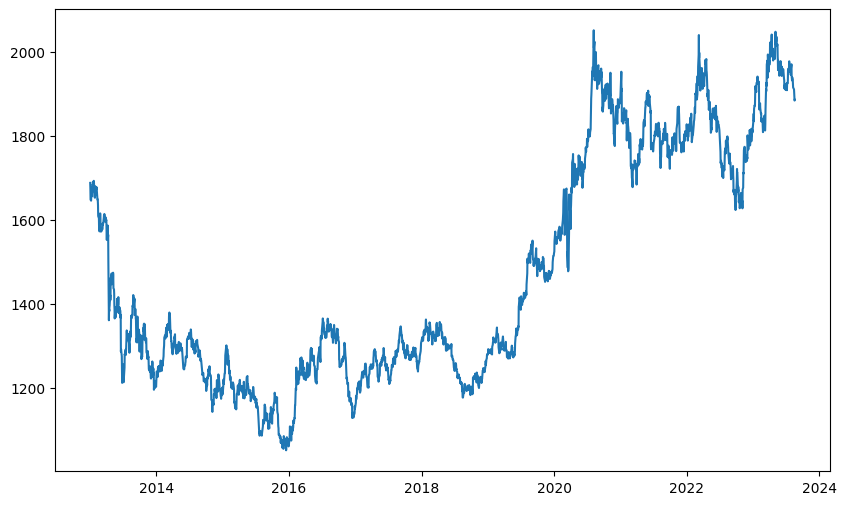

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(gold_price['Date'],gold_price['Close'])
plt.show()

In [7]:
gold_price["Date"]=pd.to_datetime(gold_price["Date"])

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [13]:
Exp_model=ExponentialSmoothing(gold_price["Close"],trend="add",seasonal='mul', seasonal_periods=365)
fitted_model = Exp_model.fit()

In [14]:
future_dates = pd.date_range(start=gold_price.index[-1] + pd.Timedelta(days=1), periods=30, freq="D")
future_predictions = fitted_model.forecast(len(future_dates))


TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

In [15]:
import pandas as pd

# Make sure gold_price.index[-1] is a timestamp or datetime object
last_date = gold_price.index[-1]
if isinstance(last_date, pd.Timestamp):
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D")
    future_predictions = fitted_model.forecast(len(future_dates))
else:
    print("The last date is not a valid timestamp or datetime object.")


The last date is not a valid timestamp or datetime object.


In [16]:
gold_price.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [17]:
print(gold_price['Date'].dtype)

datetime64[ns]


In [19]:
import pandas as pd

#
last_date = gold_price['Date'].iloc[-1]  # Get the last date in the "Date" column


if isinstance(last_date, pd.Timestamp):
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30, freq="D")
    
else:
    print("The last date is not a valid timestamp or datetime object.")


In [20]:
future_dates

DatetimeIndex(['2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26',
               '2023-08-27', '2023-08-28', '2023-08-29', '2023-08-30',
               '2023-08-31', '2023-09-01', '2023-09-02', '2023-09-03',
               '2023-09-04', '2023-09-05', '2023-09-06', '2023-09-07',
               '2023-09-08', '2023-09-09', '2023-09-10', '2023-09-11',
               '2023-09-12', '2023-09-13', '2023-09-14', '2023-09-15',
               '2023-09-16', '2023-09-17'],
              dtype='datetime64[ns]', freq='D')

In [21]:
future_close=fitted_model.forecast(len(future_dates))

In [23]:
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_Price': future_close
})

In [24]:
forecast_df

,Date,Predicted_Price
2673,2023-08-19,1889.611076
2674,2023-08-20,1875.670944
2675,2023-08-21,1877.329336
2676,2023-08-22,1866.795775
2677,2023-08-23,1859.523788
2678,2023-08-24,1860.911545
2679,2023-08-25,1858.325148
2680,2023-08-26,1859.176711
2681,2023-08-27,1856.248912
2682,2023-08-28,1843.365618


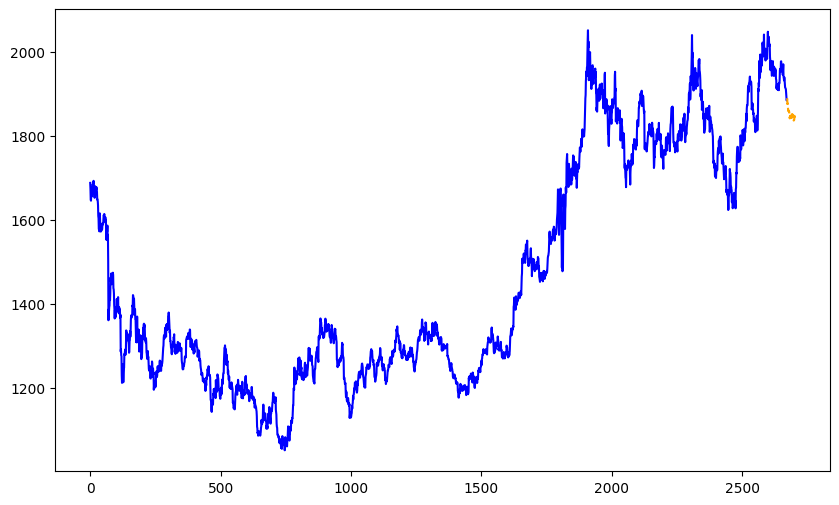

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(gold_price.index, gold_price["Close"], label="Past_Price", color="blue")
plt.plot(forecast_df.index, forecast_df["Predicted_Price"], label="Forecasted Prices", color="orange", linestyle="--")
